## Download GloVe word embeddings
We will use it to create the embedding layer so we will not have to train it in the model

In [1]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-26 12:11:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-26 12:11:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-26 12:11:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [2]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [3]:
!rm -rf glove.6B.50d.txt
!rm -rf glove.6B.200d.txt
!rm -rf glove.6B.300d.txt

In [4]:
!pip install wordcloud --quiet

## Download the dataset

In [5]:
!wget https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl

--2020-07-26 12:18:40--  https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/607ptdakxuh5i4s/merged_training.pkl [following]
--2020-07-26 12:18:40--  https://www.dropbox.com/s/raw/607ptdakxuh5i4s/merged_training.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc265b3cba03665a779ca0b032ae.dl.dropboxusercontent.com/cd/0/inline/A8RIZ6fpsK-xA4ZflFyt0DcE-6zjbKn_VObNBauSBqzRGfRziBbCWhHz5pgTdPXQH9jw3kEXGrionmF9vBIDVkZ3q7hN1NrNz2JhI_FMq4NhntPn4e26Hb_arERWtLtGUyc/file# [following]
--2020-07-26 12:18:41--  https://uc265b3cba03665a779ca0b032ae.dl.dropboxusercontent.com/cd/0/inline/A8RIZ6fpsK-xA4ZflFyt0DcE-6zjbKn_VObNBauSBqzRGfRziBbCWhHz5pgTdPXQH9jw3kEXGrionmF9vBIDVkZ3q7hN1

In [6]:
import pickle

## helper function
def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [7]:
data = load_from_pickle(directory="merged_training.pkl")

## using a sample
emotions = [ "sadness", "joy", "love", "anger", "fear", "surprise"]
data= data[data["emotions"].isin(emotions)]

In [8]:
data.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416809 entries, 27383 to 64703
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      416809 non-null  object
 1   emotions  416809 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [10]:
data.describe()

,text,emotions
count,416809,416809
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,141067


In [11]:
data.isnull().sum()

text        0
emotions    0
dtype: int64

In [12]:
data.to_csv('text-emotions.csv')

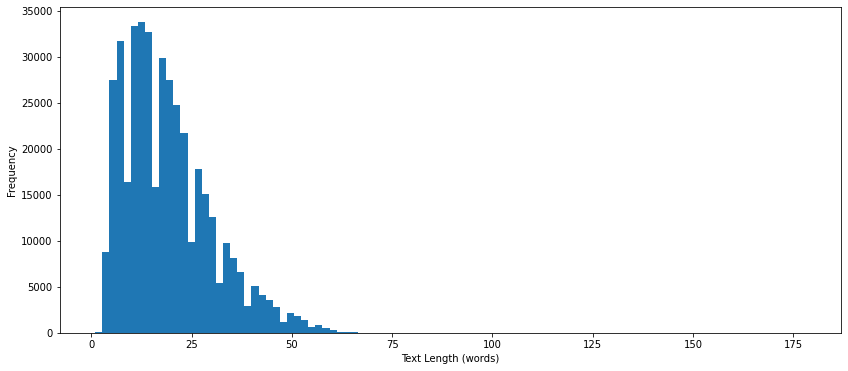

In [13]:
## Getting the number of words by splitting them by a space
import matplotlib.pyplot as plt

words_per_text = data.text.apply(lambda x: len(x.split(" ")))
plt.figure(figsize=(14,6))
plt.hist(words_per_text, bins=100)
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.show()

In [14]:
print('Average words:', words_per_text.mean())
print('Skewness:', words_per_text.skew())

Average words: 19.211015117235952
Skewness: 0.9881399107615898


In [15]:
data.emotions.value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

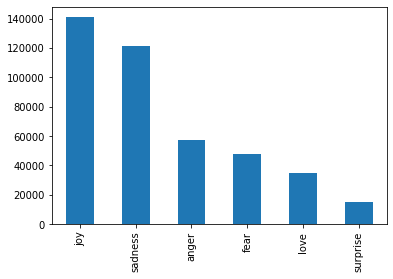

In [16]:
data.emotions.value_counts().plot.bar()
plt.show()

In [17]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 170 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)

train = data

#labels = emotions
y = train['emotions'].values
comments_train = train['text']
comments_train = list(comments_train)

In [18]:
y

array(['sadness', 'sadness', 'joy', ..., 'sadness', 'joy', 'sadness'],
      dtype=object)

In [19]:
len(comments_train)

416809

In [20]:
max_text = (max(comments_train, key=len))

In [21]:
len(max_text.split())

178

In [22]:
def num_words(sentence):
  words = sentence.split()
  return len(words)

In [23]:
total_avg_words = sum( map(num_words, comments_train) ) / len(comments_train)
total_avg_words

19.211015117235952

In [24]:
MAX_SEQUENCE_LENGTH = 50

## Text pre-proccessing

In [25]:
import re
from tqdm.notebook import tqdm

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[1:-3].replace("  ", " ")

In [27]:
texts = [] 
print(len(comments_train))

i = 0
for line in comments_train[0:159571]: 
   texts.append(clean_text(line))
   i = i + 1
   print(i)

Streaming output truncated to the last 5000 lines.
154573
154574
154575
154576
154577
154578
154579
154580
154581
154582
154583
154584
154585
154586
154587
154588
154589
154590
154591
154592
154593
154594
154595
154596
154597
154598
154599
154600
154601
154602
154603
154604
154605
154606
154607
154608
154609
154610
154611
154612
154613
154614
154615
154616
154617
154618
154619
154620
154621
154622
154623
154624
154625
154626
154627
154628
154629
154630
154631
154632
154633
154634
154635
154636
154637
154638
154639
154640
154641
154642
154643
154644
154645
154646
154647
154648
154649
154650
154651
154652
154653
154654
154655
154656
154657
154658
154659
154660
154661
154662
154663
154664
154665
154666
154667
154668
154669
154670
154671
154672
154673
154674
154675
154676
154677
154678
154679
154680
154681
154682
154683
154684
154685
154686
154687
154688
154689
154690
154691
154692
154693
154694
154695
154696
154697
154698
154699
154700
154701
154702
154703
154704
154705
154706
154707
1547

In [46]:
len(texts)

159571

In [47]:
print('Sample data:', texts[1], y[1])

Sample data: m alone feel aw sadness


## Tokenize the texts

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 55091


In [50]:
import json
with open('word_index.json', 'w') as f:
    json.dump(word_index, f)
with open('index_word.json', 'w') as f2:
    json.dump(tokenizer.index_word, f2)

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (159571, 50)
Shape of label tensor: (416809,)


In [52]:
import numpy as np

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

In [53]:
data[25]

array([   7,  421,  991, 2106,  804,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [54]:
labels[25]

'joy'

## One-hot encoding labels

In [55]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(labels)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [56]:
lb.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [57]:
labels = lb.transform(labels)

In [58]:
labels[25]

array([0, 0, 1, 0, 0, 0])

In [59]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [17595 14821 43187 10505 36968  4581]
validation:  [ 4430  3638 10680  2664  9305  1197]


In [60]:
x_train.shape

(127657, 50)

In [61]:
y_train.shape

(127657, 6)

In [62]:
x_val.shape

(31914, 50)

In [63]:
y_val.shape

(31914, 6)

## Create test set

In [64]:
x_val = x_val[: -40000]
y_val = y_val[: -40000]
x_test = x_val[-40000: ]
y_test = y_val[-40000: ]

In [65]:
print('Tokenized sentences: \n', data[10])
print('One hot label: \n', labels[10])

Tokenized sentences: 
 [ 888  100   35    2    4 9855  117  126  549 1859   16   51   61  772
  524 7865    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
One hot label: 
 [0 0 1 0 0 0]


## Create the embedding matrix for our model

In [66]:
embeddings_index = {}
f = open('./glove.6B.100d.txt')
print('Loading GloVe from:', './glove.6B.100d.txt','...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: ./glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [67]:
embedding_matrix.shape

(55092, 100)

## Create the model (function API)

In [68]:
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [69]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(120, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.2)(x)
x = Dense(60, activation="relu")(x)
x = Dropout(0.2)(x)
preds = Dense(6, activation="softmax")(x)

In [70]:
model = Model(sequence_input, preds)
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

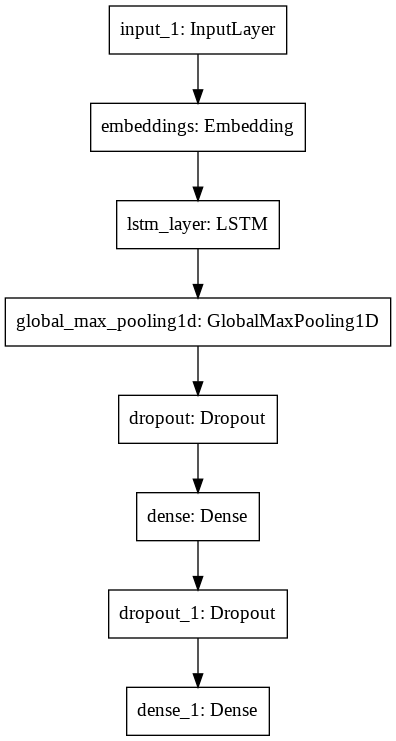

In [71]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
print('Training progress:')
history = model.fit(x_train, y_train, epochs = 10, batch_size=128, validation_data=(x_val, y_val))

Training progress:
Epoch 1/10
2606/2606 [==============================] - 19s 7ms/step - loss: 0.5276 - accuracy: 0.8029 - val_loss: 0.1996 - val_accuracy: 0.9102
Epoch 2/10
2606/2606 [==============================] - 18s 7ms/step - loss: 0.1912 - accuracy: 0.9146 - val_loss: 0.1459 - val_accuracy: 0.9216
Epoch 3/10
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1466 - accuracy: 0.9248 - val_loss: 0.1324 - val_accuracy: 0.9243
Epoch 4/10
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1318 - accuracy: 0.9276 - val_loss: 0.1238 - val_accuracy: 0.9259
Epoch 5/10
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1238 - accuracy: 0.9288 - val_loss: 0.1237 - val_accuracy: 0.9262
Epoch 6/10
2606/2606 [==============================] - 20s 7ms/step - loss: 0.1189 - accuracy: 0.9302 - val_loss: 0.1230 - val_accuracy: 0.9274
Epoch 7/10
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1166 - accuracy: 0.9311 - val_lo

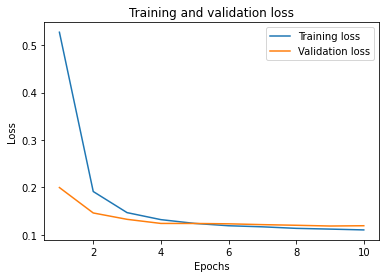

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

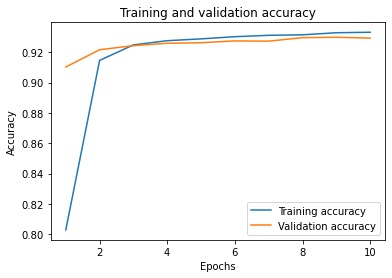

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
print("Accuracy in the test set:")
model.evaluate(x_test, y_test)[1]

Accuracy in the test set:
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1189 - accuracy: 0.9297


0.9296749830245972

## Test the model

In [74]:
samples = ['i feel like', 'i am happy...', 'love you woman', 'that is so funny', 'mamma, i just killed a man', 'i want to ride my bicycle', 'im alone i feel awful', 'i beleive that i am much more sensitive to oth...']

In [75]:
cleaned_samples = []
for sentence in samples:
  print(sentence)
  cleaned = clean_text(sentence)
  print(cleaned)
  cleaned_samples.append(cleaned)

i feel like
eel l
i am happy...
a
love you woman
ove wo
that is so funny
u
mamma, i just killed a man
amma killed 
i want to ride my bicycle
ant ride bicy
im alone i feel awful
m alone feel aw
i beleive that i am much more sensitive to oth...
eleive much sensitive 


In [76]:
tokenized_seq = tokenizer.texts_to_sequences(cleaned_samples)
padded_seq =  pad_sequences(tokenized_seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

In [77]:
int2label = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

In [78]:
predictions = model.predict(padded_seq)

In [79]:
for i, prediction in enumerate(predictions):
  print(samples[i] +" => " +int2label[(np.argmax(prediction))])

i feel like => sadness
i am happy... => anger
love you woman => sadness
that is so funny => sadness
mamma, i just killed a man => sadness
i want to ride my bicycle => sadness
im alone i feel awful => sadness
i beleive that i am much more sensitive to oth... => sadness


In [72]:
model.save('model.h5')

In [73]:
model = tf.keras.models.load_model('model.h5')

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [81]:
!unzip '/content/drive/My Drive/data_without_id.zip'

Archive:  /content/drive/My Drive/data_without_id.zip
   creating: data_without_id/
  inflating: data_without_id/2020-03-05.csv  
  inflating: data_without_id/2020-03-06.csv  
  inflating: data_without_id/2020-03-07.csv  
  inflating: data_without_id/2020-03-08.csv  
  inflating: data_without_id/2020-03-09.csv  
  inflating: data_without_id/2020-03-10.csv  
  inflating: data_without_id/2020-03-11.csv  
  inflating: data_without_id/2020-03-12.csv  
  inflating: data_without_id/2020-03-13.csv  
  inflating: data_without_id/2020-03-14.csv  
  inflating: data_without_id/2020-03-15.csv  
  inflating: data_without_id/2020-03-16.csv  
  inflating: data_without_id/2020-03-17.csv  
  inflating: data_without_id/2020-03-18.csv  
  inflating: data_without_id/2020-03-19.csv  
  inflating: data_without_id/2020-03-20.csv  
  inflating: data_without_id/2020-03-21.csv  
  inflating: data_without_id/2020-03-22.csv  
  inflating: data_without_id/2020-03-23.csv  
  inflating: data_without_id/2020-03-24.cs

In [96]:
import zipfile
import pandas as pd


with zipfile.ZipFile('/content/drive/My Drive/data_without_id.zip', "r") as f:
    for name in f.namelist():
        if name.endswith('2020-03-06.csv '):
            data = f.open(name)
            sample = pd.read_csv(data)

In [311]:
import glob
import pandas as pd
path = 'data_without_id' # use your path
all_files = glob.glob(path + "/2020-03-24.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [312]:
frame


,created_at,loc,sentiment,subjectivity,text,user_id,verified
0,2020-03-24 00:00:00+00:00,GA,0.400000,0.550000,cokayn after this corona shit living best life,u1010646,0
1,2020-03-24 00:00:00+00:00,PA,-1.000000,1.000000,here ways help philly restaurant industry weat...,u1074370,1
2,2020-03-24 00:00:00+00:00,NY,0.000000,0.000000,watch musician turns nirvanas stay away into c...,u1074371,1
3,2020-03-24 00:00:00+00:00,CA,0.000000,0.000000,annamzep miss your miss life without corona virus,u1074372,0
4,2020-03-24 00:00:00+00:00,OK,-0.400000,0.600000,madelineeryanee dear corona fuck class 2020,u108608,0
...,...,...,...,...,...,...,...
115273,2020-03-24 23:59:55+00:00,AZ,0.500000,0.500000,media host americans panic fact most americans...,u212542,0
115274,2020-03-24 23:59:56+00:00,NC,0.200000,0.200000,charliemase corona really came said https nc5a...,u299036,0
115275,2020-03-24 23:59:56+00:00,CA,0.200000,0.200000,charliemase corona really came said https nc5a...,u164477,0
115276,2020-03-24 23:59:57+00:00,SC,-0.600000,0.800000,emilycanneyx what fucking cockblock this coron...,u1104393,0


In [313]:
cleaned_testsamples = []
for sentence in frame['text']:
  print(sentence)
  cleaned = clean_text(sentence)
  print(cleaned)
  cleaned_testsamples.append(cleaned)

Streaming output truncated to the last 5000 lines.
born2bslick corona going e
dear corona there talking bitch finish
ear corona talking bitch fin
notlittlenick hope corona virus takes cheating bitches
otlittlenick hope corona virus takes cheating bitc
brownandboujiee corona virus from whatsapp university
rownandboujiee corona virus whatsapp univers
_louisalexander raise your hand youre ready this pinche corona virus away float river https e1atydpe20
louisalexander raise hand youre ready pinche corona virus away float river https e1atydp
kansasxx mean wish anyone bella thorne corona upset
ansasxx mean wish anyone bella thorne corona up
memphis fuck around national guard sent here because corona because these niggas here https uuyea jlem
emphis fuck around national guard sent corona niggas https uuyea j
nuzunuluocak ürre corona şüphesiyle sadi konuk eğitim ştırma hastanesine yatı verildi zaten saat beri burda
uzunuluocak ürre corona şüphesiyle sadi konuk eğitim ştırma hastanesine yatı ve

In [314]:
tokenized_seq = tokenizer.texts_to_sequences(cleaned_testsamples)
padded_seq =  pad_sequences(tokenized_seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

In [315]:
int2label = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

In [316]:
predictions = model.predict(padded_seq)

In [317]:
labels = []
for i, prediction in enumerate(predictions):
  print(cleaned_testsamples[i] +" => " +int2label[(np.argmax(prediction))])
  labels.append(int2label[(np.argmax(prediction))])

Streaming output truncated to the last 5000 lines.
onaldjtrumpny pelosi trumpsguilty coronavirus covid coronaoutbreak trumpvirus coronavirussa jones coronaviruschalle => anger
olly_t corona enjoy lockdown hope makes happy good lord little l => sadness
espiiiiii corona beer challenge https vygcez => sadness
eally listening people twitter corona virus nothing gonna make immune please https ftfndwc => sadness
mer___go announced corona spread instagram story challen => sadness
ulualpha hands hour shift scrubbing every hour transporting corona positive patients hospital stay indo => fear
ouiecasttro fighting corona virus cause shit https lp83mc => sadness
ithout corona h => sadness
ikkishangee corona virus reality move bcos understand righteousn => sadness
rowning ground dinner tonight aredefinedlife corona togetherapart healthyprotein proudhunter https wn2lgas => sadness
sjpeace_ usama riaz spent past weeks screening treating patients corona virus pakistan k => fear
atched video corona sym

In [318]:
datetime = frame["created_at"].tolist()
tweets = cleaned_testsamples
labels

['sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'fear',
 'fear',
 'sadness',
 'fear',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'fear',
 'sadness',
 'fear',
 'fear',
 'sadness',
 'fear',
 'sadness',
 'fear',
 'fear',
 'fear',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'sadness',
 'fear',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'fear',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'fear',
 'fear',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',


In [319]:
df = pd.DataFrame(list(zip(datetime, tweets, labels)), 
               columns =['date', 'tweets', 'predictions'])

In [320]:
df

,date,tweets,predictions
0,2020-03-24 00:00:00+00:00,okayn corona shit living best l,sadness
1,2020-03-24 00:00:00+00:00,ays help philly restaurant industry weather de...,sadness
2,2020-03-24 00:00:00+00:00,atch musician turns nirvanas stay away coronav...,fear
3,2020-03-24 00:00:00+00:00,nnamzep miss miss life without corona vi,sadness
4,2020-03-24 00:00:00+00:00,adelineeryanee dear corona fuck class 2,sadness
...,...,...,...
115273,2020-03-24 23:59:55+00:00,edia host americans panic fact americans coron...,fear
115274,2020-03-24 23:59:56+00:00,harliemase corona really came said https nc5ahxg,sadness
115275,2020-03-24 23:59:56+00:00,harliemase corona really came said https nc5ahxg,sadness
115276,2020-03-24 23:59:57+00:00,milycanneyx fucking cockblock corona vi,sadness


In [321]:
df.to_csv("prediction-2020-03-24.csv")